<h1> Implementing KNN algorithm !! </h1>

In [2]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt

#importing train data and assigning column names
train_col_name=['rating','review']
train_dataset=pd.read_csv(r"C:\Users\abhay kumar tiwari\Downloads\train.csv",names=train_col_name)
train_data = pd.DataFrame({'rating':train_dataset['rating'], 'Review':train_dataset['review']}) 

#import test data and assigning column name
train_col_name=['review']
test_dataset=pd.read_csv(r"C:\Users\abhay kumar tiwari\Downloads\test.csv",names=train_col_name)
test_data1 = pd.DataFrame({'Review':test_dataset['review']})

In [2]:
train_data.head()

,rating,Review
0,-1,"Eat at Fioris, they said. Youll like it, they..."
1,-1,I just don't understand the appeal. I've trie...
2,1,This is my go to place for a really good beef ...
3,-1,"Not impressed. When I ordered the Oyako bowl, ..."
4,-1,This is the first time ever I wrote a bad revi...


In [3]:
test_data1.head()

,Review
0,Got take-out from here last night and it was H...
1,Girls are sweet and prices are reasonable. The...
2,Rudest people I have ever encountered. Husban...
3,This airport is only coveted for the destinati...
4,The last 4 months have shown a steady decline ...


Text(0.5, 0, 'Label')

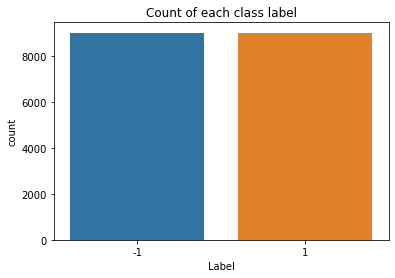

In [4]:
# plotting the graph for the count of +1 and -1

import seaborn as sns
sns.countplot(x=train_data["rating"])
plt.title('Count of each class label')
plt.xlabel('Label')

In [3]:
# Data preprocessing
# lowering the case, removing stopwords, removing punctuation from reviews column
import nltk
nltk.download('stopwords')
from string import punctuation
from nltk.corpus import stopwords

stopwords_en = set(stopwords.words('english'))
stopwords_en_withpunct = stopwords_en.union(set(punctuation))
stopwords_en_withpunct.remove('not')
stopwords_en_withpunct.add("\n")
import re
def preprocess(phrase):
    phrase=phrase.lower()
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    list1 = phrase.split()
    output = [w for w in list1 if not w in stopwords_en_withpunct]
    
    comment=""
    for i in output:
      comment=comment+i+" "
    return comment.strip()

[nltk_data] Downloading package stopwords to C:\Users\abhay kumar
[nltk_data]     tiwari\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [6]:
test_data1['Review'] = test_data1['Review'].apply(lambda x: preprocess(x))
train_data['Review'] = train_data['Review'].apply(lambda x: preprocess(x))

In [7]:
#stemming of the data

test_data=train_data[12600:]
train_data=train_data[:12600]

from nltk.stem.porter import PorterStemmer
def simple_stemmer(text):
    ps=PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Apply function on review column
test_data['Review']=test_data['Review'].apply(simple_stemmer)
test_data1['Review']=test_data1['Review'].apply(simple_stemmer)
train_data['Review']=train_data['Review'].apply(simple_stemmer)

In [8]:
# Peforming tf-idf
# Vectorization

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(norm = 'l2',min_df = 3, use_idf = True, smooth_idf = False, sublinear_tf = True, \
                             ngram_range=(1,2),max_df = 15000)
# Converting to a vector
train_vector = tfidf_vectorizer.fit_transform(train_data["Review"])
test_vector1 = tfidf_vectorizer.transform(test_data1["Review"])
test_vector = tfidf_vectorizer.transform(test_data["Review"])

In [9]:
# KNN algorithm
def predict_knn(nearestNeighbors, labels):
    positive_review = 0
    negative_review = 0
    for neighbor in nearestNeighbors:
        if int(labels[neighbor]) == 1:
            positive_review = positive_review + 1
        else:
            negative_review = negative_review + 1
    if positive_review > negative_review:
        return 1
    else:
        return -1

In [10]:
#calculating accuracy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import metrics

def cal_acc(k):
    c = cosine_similarity(test_vector,train_vector)
    predict_class_label = list()
    for similarity in c:
        knn = np.argsort(-similarity)[:k]
        prediction = predict_knn(knn, train_data["rating"])
        if prediction == -1:
            predict_class_label.append(-1)
        else:
            predict_class_label.append(1)
    accuracy = metrics.accuracy_score(test_data["rating"], predict_class_label)
    return accuracy,predict_class_label


pred=cal_acc(100)
accuracy=pred[0]

# getting our prediction file
with open("/Users/anjali/Documents/Materials/SEM - 1/CS 584/HW/HW1_Maddila/prediction_file.txt", 'w') as log:
    for x in pred[1]:
        log.write(str(x)+'\n')

In [11]:
print(accuracy)

0.8783333333333333
